## Impôts sur le revenu

- Visualition du manque de "proportionnalité" des modèles.
- Visualition des points de bascules.

In [1]:
import matplotlib.pyplot as plt

In [2]:
taux_macron = [0, 11, 30, 41, 45, 45]
# salaires_macron = [0,11294,28797,82341,177106,411683,500000]
salaires_macron = [0, 11, 28, 82, 177, 411, 500]

taux_nfp = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 90]
# salaires_nfp = [0,10292,15438,20584,27789,30876,33964,38081,44256,61752,102921,144089,267594,411683,500000]
salaires_nfp = [0, 10, 15, 20, 27, 30, 33, 38, 44, 61, 102, 144, 267, 411, 500]

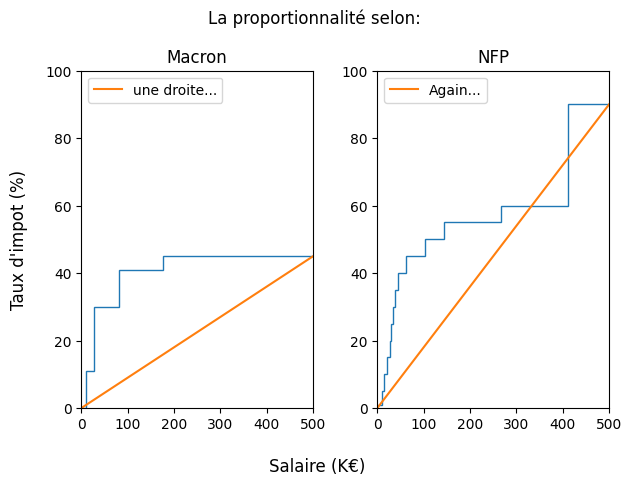

In [3]:
fig, ax = plt.subplots(1, 2)

fig.suptitle("La proportionnalité selon: ")
fig.supxlabel("Salaire (K€)")
fig.supylabel("Taux d'impot (%)")

ax[0].title.set_text("Macron")
ax[1].title.set_text("NFP")

ax[0].set_ylim(0, 100)
ax[1].set_ylim(0, 100)

ax[0].set_xlim(0, 500)
ax[1].set_xlim(0, 500)

fig.align_ylabels([ax[0], ax[1]])

original_1 = ax[0].stairs(taux_macron, salaires_macron, baseline=None)
compare_1 = ax[0].plot([0, 500], [0, 45])
original_2 = ax[1].stairs(taux_nfp, salaires_nfp, baseline=None)
compare_2 = ax[1].plot([0, 500], [0, 90])

ax[0].legend(compare_1, ["une droite..."], loc="upper left")
ax[1].legend(compare_2, ["Again..."], loc="upper left")

fig.tight_layout()
# fig.savefig("out1.png")

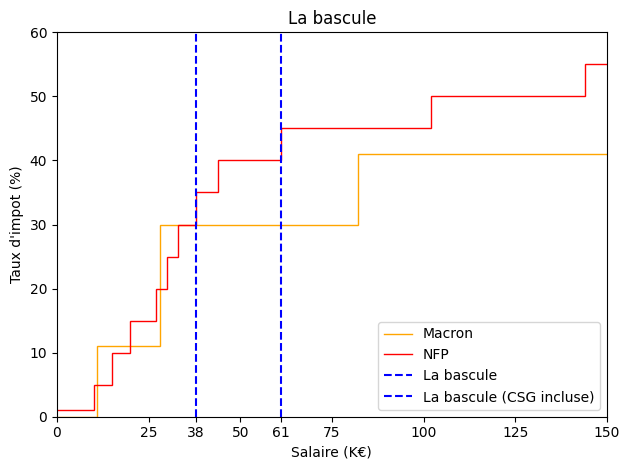

In [4]:
fig, ax = plt.subplots(1, 1)

ax.set_title("La bascule")
ax.set_xlabel("Salaire (K€)")
ax.set_ylabel("Taux d'impot (%)")

ax.set_ylim(0, 60)
ax.set_xlim(0, 150)

og_mac = ax.stairs(
    taux_macron, salaires_macron, baseline=None, label="Macron", color="orange"
)
og_nfp = ax.stairs(taux_nfp, salaires_nfp, baseline=None, label="NFP", color="red")

plt.vlines(
    x=38, ymin=0, ymax=60, colors="blue", linestyles="dashed", label="La bascule"
)
plt.vlines(
    x=61,
    ymin=0,
    ymax=60,
    colors="blue",
    linestyles="dashed",
    label="La bascule (CSG incluse)",
)

plt.xticks([0, 25, 38, 50, 61, 75, 100, 125, 150])

ax.legend(loc="lower right")

fig.tight_layout()
# fig.savefig("out2.png")